# Time Series

In [1]:
import pandas as pd
import seaborn as sns

## (1) Oslo city bike

**(1.1) Download the September 2023 city bike data here https://oslobysykkel.no/en/open-data/historical. Import the dataset and set the column <code>started_at</code> as DatetimeIndex.**<br> 
(The description of each column can be found on the same page.)

In [2]:
bike_raw_df = pd.read_csv("../dataset/09.csv", parse_dates = ["started_at"], index_col  = [0])
bike_raw_df.head(5)

,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
started_at,,,,,,,,,,,,
2023-09-01 03:00:13.703000+00:00,2023-09-01 03:04:45.667000+00:00,271,2357,Aker Brygge 2 mot Rådhusplassen,ved plattform H i retning rådhuset,59.911115,10.730397,537,St. Olavs gate,ved Pilestredet,59.917968,10.738629
2023-09-01 03:01:13.151000+00:00,2023-09-01 03:12:47.799000+00:00,694,526,Lille Grensen,Ved Akersgata,59.913897,10.742310,408,Tøyen skole,forsiden av skolebygget,59.914943,10.773977
2023-09-01 03:02:47.838000+00:00,2023-09-01 03:08:53.594000+00:00,365,453,Frogner Stadion,ved hovedinngangen,59.927538,10.710263,511,Henrik Ibsens gate,ved Parkveien,59.915088,10.722280
2023-09-01 03:06:38.884000+00:00,2023-09-01 03:10:42.231000+00:00,243,2339,Elgsletta,langs Nylandsveien,59.915649,10.761725,2328,The Hub,Mellom Oslo City og The Hub hotel,59.912522,10.750910
2023-09-01 03:19:37.513000+00:00,2023-09-01 03:27:15.072000+00:00,457,598,Sofienbergparken nord,langs Helgesens gate,59.923229,10.766171,478,Jernbanetorget,Europarådets plass,59.911901,10.749929


**(1.2) Select a subset with two columns: <code>duration</code> and <code>start_station_name</code>. Use this subset to solve the following tasks.**<br>
Hint: <code>copy()</code>

In [3]:
bike_df = bike_raw_df.loc[:, ["duration", "start_station_name"]].copy()
bike_df.head(5)

,duration,start_station_name
started_at,,
2023-09-01 03:00:13.703000+00:00,271,Aker Brygge 2 mot Rådhusplassen
2023-09-01 03:01:13.151000+00:00,694,Lille Grensen
2023-09-01 03:02:47.838000+00:00,365,Frogner Stadion
2023-09-01 03:06:38.884000+00:00,243,Elgsletta
2023-09-01 03:19:37.513000+00:00,457,Sofienbergparken nord


**(1.3) How many trips departed from <code>Olaf Ryes plass</code> station on September 10?**

In [4]:
bike_df[bike_df.start_station_name == "Olaf Ryes plass"].loc["2023-09-01", :].shape[0]

76

**(1.4) Extract the day of the week from the DatetimeIndex and add it a as new column named <code>day_of_week</code>.**

In [5]:
bike_df["day_of_week"] = bike_df.index.day_name()
bike_df.head(5)

,duration,start_station_name,day_of_week
started_at,,,
2023-09-01 03:00:13.703000+00:00,271,Aker Brygge 2 mot Rådhusplassen,Friday
2023-09-01 03:01:13.151000+00:00,694,Lille Grensen,Friday
2023-09-01 03:02:47.838000+00:00,365,Frogner Stadion,Friday
2023-09-01 03:06:38.884000+00:00,243,Elgsletta,Friday
2023-09-01 03:19:37.513000+00:00,457,Sofienbergparken nord,Friday


**(1.5) Select the data from September 4 to 24. Count the number of trips departing from the following stations on each day of the week.**<br>
<code>Alexander Kiellands Plass, Ringnes Park, Olaf Ryes plass, Tøyen skole, Bislett Stadion, Jernbanetorget, BI Nydalen.</code>   
Expected result:

||Monday|Tuesday|Wednesday|Thursday|Friday|Saturday|Sunday|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|**Alexander Kiellands Plass**|158|239|...|...|...|...|...|   
|**BI Nydalen**|92|...|...|...|...|...|...|   
|**Bislett Stadion**|...|...|...|...|...|...|     
|**Jernbanetorget**|...|...|...|...|...|...|     
|**Olaf Ryes plass**|...|...|...|...|...|...|    
|**Ringnes Park**|...|...|...|...|...|...|    
|**Tøyen skole**|...|...|...|...|...|...|    

In [6]:
# Select rows
bike_df_tmp = bike_df.loc["2023-09-04":"2023-09-24"]

# Select columns
bike_df_sub = bike_df_tmp[bike_df_tmp.start_station_name.isin(["Alexander Kiellands Plass", "Ringnes Park", "Olaf Ryes plass", "Tøyen skole", "Bislett Stadion", "Jernbanetorget", "BI Nydalen"])]

# Calculate the frequency of each station for each day of the week
bike_ct = pd.crosstab(bike_df_sub["start_station_name"], bike_df_sub["day_of_week"])

# Rearrange the order of columns 
bike_ct = bike_ct[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]] 
bike_ct

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
start_station_name,,,,,,,
Alexander Kiellands Plass,158,239,227,231,170,203,164
BI Nydalen,92,121,98,97,80,32,27
Bislett Stadion,118,161,126,140,121,117,132
Jernbanetorget,87,141,120,92,113,47,86
Olaf Ryes plass,155,186,182,159,148,167,129
Ringnes Park,176,225,198,184,160,203,130
Tøyen skole,141,185,191,164,142,168,123


**(1.6) Use a heatmap to display the result obtained in (1.5). Answer the following question.**

<Axes: xlabel='day_of_week', ylabel='start_station_name'>

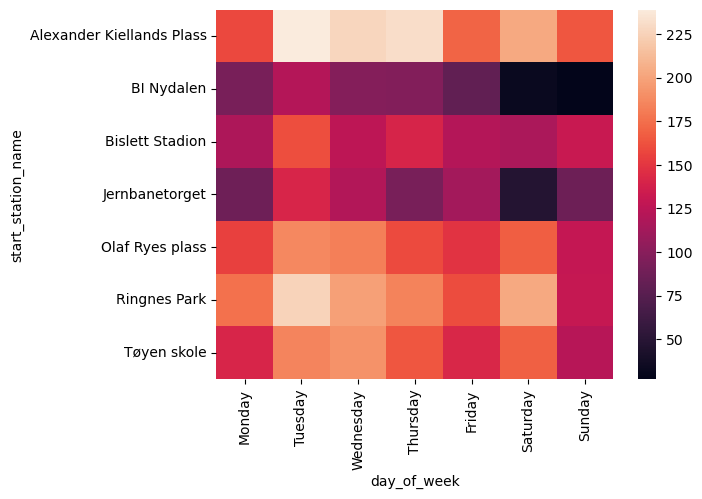

In [7]:
sns.heatmap(bike_ct)

**Question:** What is the busiest day of the week (with the highest number of departures) at "Ringnes Park" station?<br>
**Answer:** Tuesday.
    

**(1.7) Calculate the number of trips in each hour on September 10 and display the result with a horizontal bar chart.**

<Axes: ylabel='started_at'>

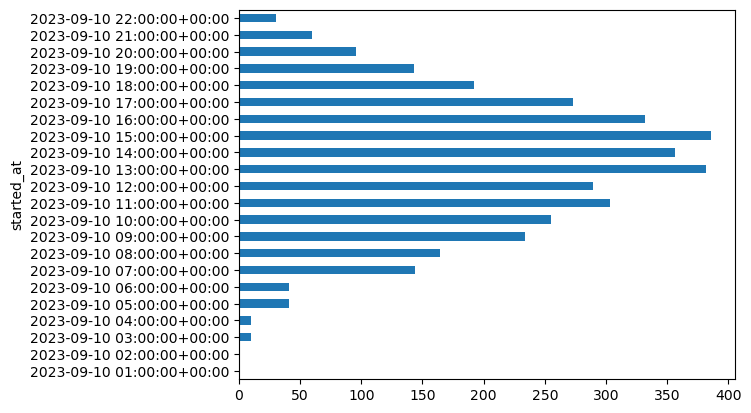

In [8]:
bike_df.loc["2023-09-10", :].resample("H").size().plot(kind="barh")

## (2) Complains
In the US, 311 is a non-emergency phone number that people can call in many cities to find information about services, make complaints, or report problems like graffiti or road damage.


**(2.1) Import the dataset <code>complaints.csv</code>. Set the column <code>Created Date</code> as DatetimeIndex.**<br>
Setting: dtype = {"Incident Zip": object}

In [9]:
complaint_df = pd.read_csv("../dataset/complaints.csv", 
                           parse_dates = ["Created Date"], 
                           index_col = [1], 
                           dtype = {"Incident Zip":object})
complaint_df.head(5)

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2013-10-31 02:08:41,26589651,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
2013-10-31 02:01:04,26593698,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2013-10-31 02:00:24,26594139,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
2013-10-31 01:56:23,26595721,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
2013-10-31 01:53:44,26590930,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


**(2.2) Sort the dataframe from oldest to newest.**<br>
Hint: <code>DataFrame.sort_index(inplace = True)</code>

In [10]:
complaint_df.sort_index(inplace = True)
complaint_df.head(5)

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2013-10-04 00:00:10,26428033,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024,-73.900717,"(40.640024057399216, -73.90071711703163)"
2013-10-04 00:00:28,26426115,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"
2013-10-04 00:00:45,26428987,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
2013-10-04 00:01:05,26428083,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
2013-10-04 00:01:13,26426013,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**(2.3) Select the complaint data handled by <code>NYPD</code>and use this subset to solve the following tasks.**<br>
Hint: Use <code>Agency</code> column

In [11]:
nypd_df = complaint_df[complaint_df.Agency == "NYPD"]
nypd_df.head(5)

,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2013-10-04 00:00:10,26428033,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024,-73.900717,"(40.640024057399216, -73.90071711703163)"
2013-10-04 00:00:28,26426115,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640182,-73.955306,"(40.64018174662485, -73.95530566958138)"
2013-10-04 00:00:45,26428987,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295,-73.976952,"(40.740295354643706, -73.97695165980414)"
2013-10-04 00:01:05,26428083,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160,-73.767353,"(40.656160351546845, -73.76735262738222)"
2013-10-04 00:03:00,26426164,10/04/2013 02:14:57 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11106,30-09 BROADWAY,BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.762279,-73.926013,"(40.762278541098084, -73.92601303458156)"


**(2.4) Use the subset obtained in (2.3). Calculate the number of complaints in each day and display the result with a line chart.**<br>
Setting: figsize = (15, 3), marker = "o"

<Axes: xlabel='Created Date'>

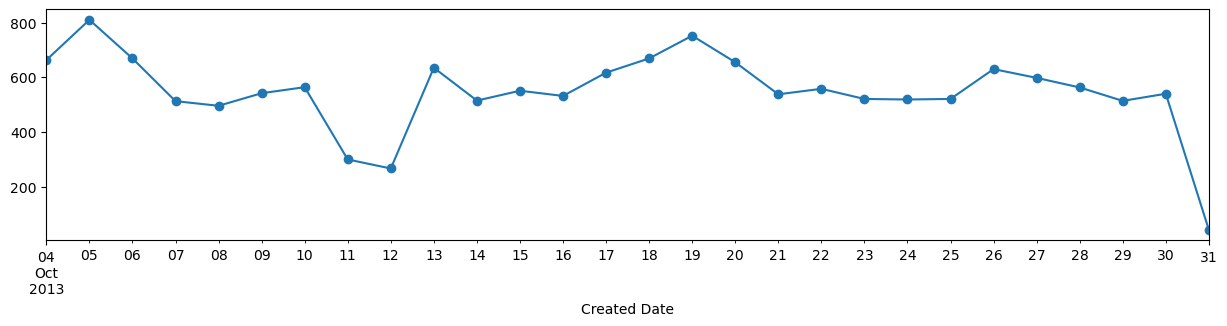

In [12]:
nypd_df.resample("D").size().plot(figsize = (15, 3), marker = "o")

**(2.5) Use the subset obtained in (2.3). Calculate the number of complaints per hour on October 19 and display the results with a line chart.**<br>
Setting: figsize = (15, 3), marker = "o", color = "green"

<Axes: xlabel='Created Date'>

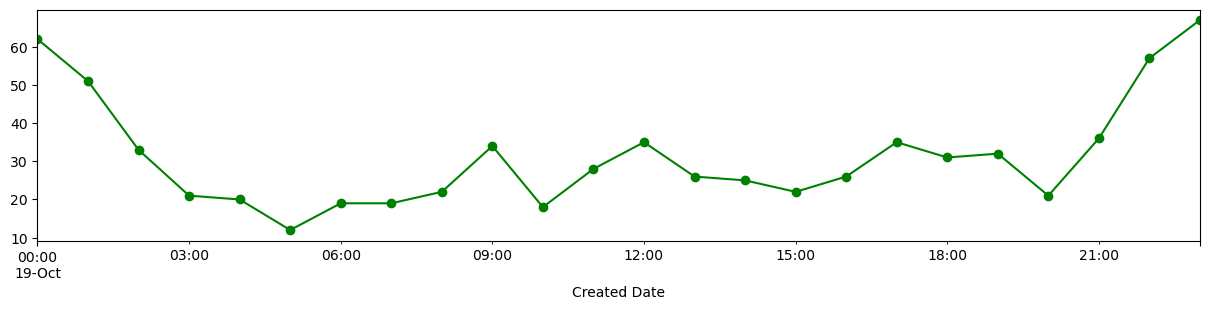

In [13]:
nypd_df.loc["2013-10-19", :].resample("H").size().plot(figsize = (15, 3), marker = "o", color = "green")

**Question:** Are there more complaints during the day or at night?<br>
**Answer:** At night.
    

## (3) Melbourne
**This file <code>melbourne.csv</code> records property sales prices in Melbourne. Descriptions of some important variables are listed below.**
- **Suburb**: Suburb
- **Price**: Price in Australian dollars

**(3.1) Import the dataset <code>melbourne.csv</code>. Set the column <code>Date</code> as DatetimeIndex.**<br>
Hint: Use argument <code>dayfirst = True</code>

In [14]:
house_df = pd.read_csv("../dataset/melbourne.csv", parse_dates = ["Date"], dayfirst = True, index_col = "Date")
house_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Date,,,,,,,,,,,,,,,,,,,,
2016-12-03,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2016-02-04,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2017-03-04,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
2017-03-04,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
2016-06-04,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**(3.2) Sort the dataframe from oldest to newest. Display the first five rows of the updated dataframe.**<br>

In [15]:
house_df.sort_index(inplace = True)
house_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Date,,,,,,,,,,,,,,,,,,,,
2016-01-28,Surrey Hills,999A Riversdale Rd,3,h,1205000.0,S,Fletchers,11.2,3127.0,3.0,1.0,2.0,490.0,NaN,NaN,Whitehorse,-37.8361,145.1006,Southern Metropolitan,5457.0
2016-01-28,Surrey Hills,1/10 Florence Rd,2,u,813000.0,S,Fletchers,11.2,3127.0,2.0,1.0,2.0,108.0,NaN,NaN,Whitehorse,-37.8276,145.1023,Southern Metropolitan,5457.0
2016-02-04,Mont Albert,50/781 Whitehorse Rd,2,u,750000.0,S,RW,11.8,3127.0,2.0,2.0,2.0,0.0,80.0,2003.0,Whitehorse,-37.8161,145.1098,Eastern Metropolitan,2079.0
2016-02-04,Ormond,7/30 Walsh St,1,u,250000.0,VB,Ray,11.8,3204.0,1.0,1.0,1.0,0.0,36.0,1960.0,Glen Eira,-37.9028,145.0475,Southern Metropolitan,3578.0
2016-02-04,Port Melbourne,404/101 Bay St,2,u,550000.0,S,Buxton,3.8,3207.0,2.0,1.0,1.0,0.0,57.0,2012.0,Port Phillip,-37.8408,144.9400,Southern Metropolitan,8648.0


**(3.3) What are the start and end dates of this dataset?**

In [16]:
# Solution-1
house_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13580 entries, 2016-01-28 to 2017-09-23
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Distance       13580 non-null  float64
 8   Postcode       13580 non-null  float64
 9   Bedroom2       13580 non-null  float64
 10  Bathroom       13580 non-null  float64
 11  Car            13518 non-null  float64
 12  Landsize       13580 non-null  float64
 13  BuildingArea   7130 non-null   float64
 14  YearBuilt      8205 non-null   float64
 15  CouncilArea    12211 non-null  object 
 16  Lattitude      13580 non-null  float64
 17  Longtitude     13580 non-null  fl

In [17]:
# Solution-2
print(house_df.index.min())
print(house_df.index.max())

2016-01-28 00:00:00
2017-09-23 00:00:00


**(3.4) How many properties were sold between June and August 2016?**

In [18]:
house_df.loc["2016-06":"2016-08", :].shape[0]

1894

**(3.5) Use a bar chart to show the number of properties sold each month.**

<Axes: xlabel='Date'>

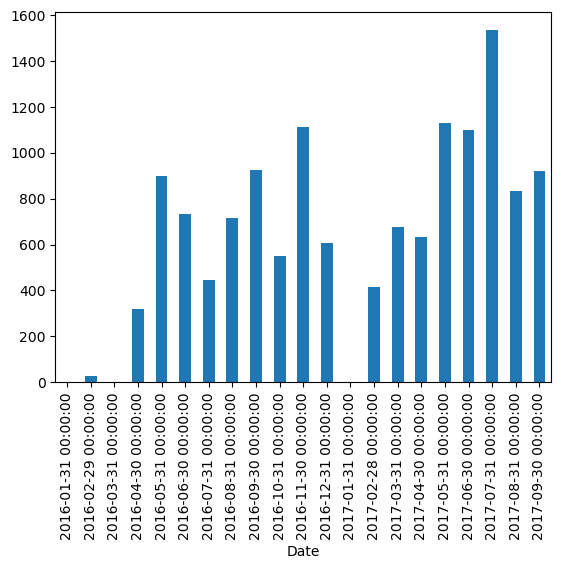

In [19]:
house_df.resample("M").size().plot(kind = "bar")

<Axes: xlabel='Date'>

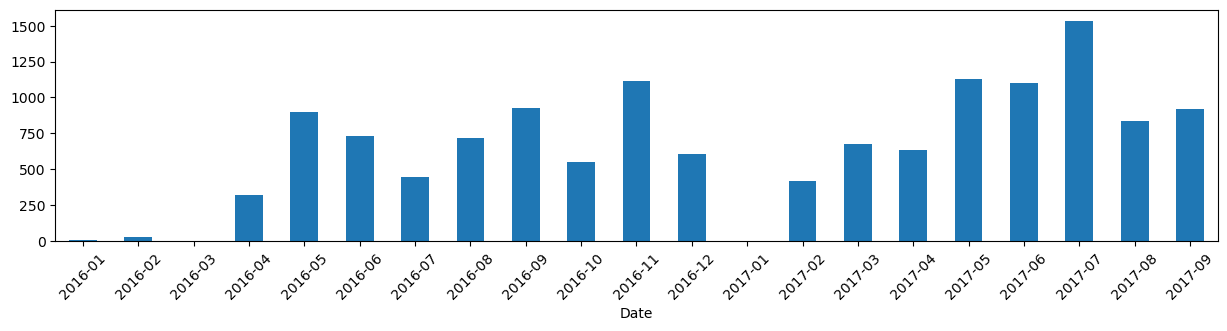

In [20]:
# optional setting
house_month = house_df.resample("M").size()
house_month.index = house_month.index.to_period("M")
house_month.plot(kind = "bar", figsize = (15, 3), rot = 45)

**(3.6) Use a line chart to display the average sales price for each month in "Richmond".**<br>
Setting: figsize = (15, 3), marker = "s", color = "orange"

<Axes: xlabel='Date'>

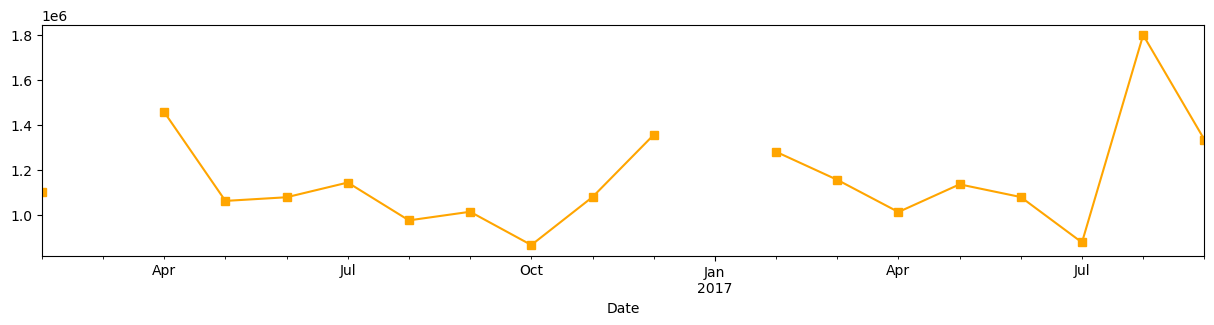

In [21]:
house_df[house_df.Suburb == "Richmond"].resample("M").Price.mean().plot(figsize = (15, 3), 
                                                                        marker = "s", 
                                                                        color = "orange")

**Question:** During which months were no properties sold in Richmond?<br>
**Answer:** March 2016 and January 2017.
    

## (4) Calls

**The following dictionary stores information about three phone calls, where the keys are the call IDs (C01, C02, and C03) and the values are tuples representing the start time and end time. Use a for loop to calculate and print out the duration of each call.**<br>

Expected result:<br>

C01: 32 seconds<br>
C02: ...<br>
C03: ...

In [22]:
call_data = {"C01": ("2023-08-01 18:11:07", "2023-08-01 18:11:39"), 
             "C02": ("2023-08-07 09:57:04", "2023-08-07 10:04:01"), 
             "C03": ("2023-08-11 13:30:51", "2023-08-11 13:32:17")}

In [23]:
import datetime as dt

In [24]:
for k, value in call_data.items():
    t1 = dt.datetime.strptime(value[0], "%Y-%m-%d %H:%M:%S")
    t2 = dt.datetime.strptime(value[1], "%Y-%m-%d %H:%M:%S")
    duration = (t2-t1).seconds
    print(f"{k}: {duration} seconds")

C01: 32 seconds
C02: 417 seconds
C03: 86 seconds
